In [2]:
!pip install fbprophet
!pip install prophet
!pip install pystan==2.19.1.1 prophet
!pip install --upgrade plotly
!pip install pmdarima

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9540869 sha256=5e461d18b886f8d76b2d8e46cc678d9b16931d2d63508222edf8c41d052a2194
  Stored in directory: /workspace/.pyenv_mirror/pip_cache/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
  Using cached cmdstanpy-1.0.7-py3-none-any.whl (80 kB)
  Attempting uninstall: cmdstanpy
    Found existing inst

In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
from prophet import Prophet
from prophet.plot import plot_plotly
from pmdarima.arima import auto_arima
from pylab import rcParams

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [5]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_a.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [6]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head

<bound method NDFrame.head of                       cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08
...                   ...
2017-01-28 04:37:00  1.45
2017-01-28 04:38:00  1.78
2017-01-28 04:39:00  1.77
2017-01-28 04:40:00  1.67
2017-01-28 04:41:00  1.67

[600 rows x 1 columns]>

In [7]:
data_train_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2017-01-27 18:42:00 to 2017-01-28 01:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [8]:
data_train_a.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [9]:
data_test_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-28 01:42:00 to 2017-01-28 02:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [10]:
data_train_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2017-01-27 18:42:00 to 2017-01-28 04:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     600 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


In [11]:
data_test_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-28 04:42:00 to 2017-01-28 05:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


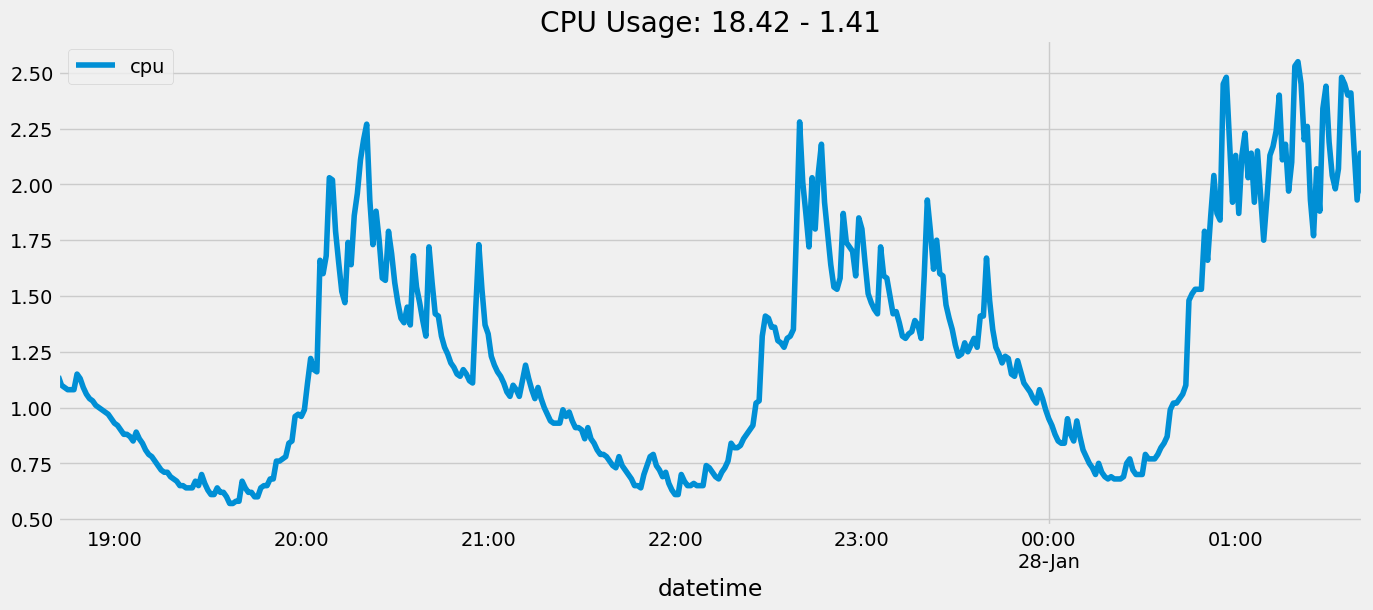

In [12]:
data_train_a.plot(title="CPU Usage: 18.42 - 1.41", figsize=(15,6))
plt.show()

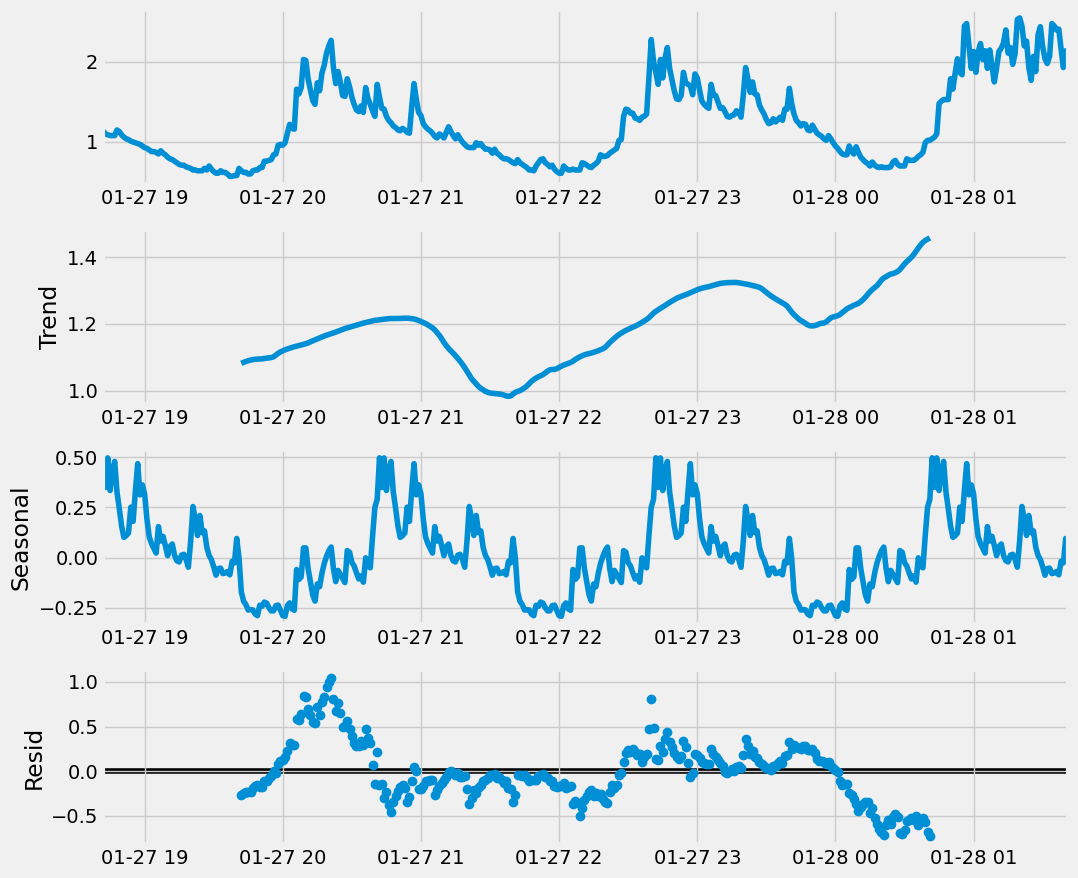

In [13]:
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(data_train_a,model='additive',period=60*2) # 2 hours period, the datetime is in minutes
fig = decomposition.plot()
plt.show()

In [14]:
data_train_a.reset_index(inplace=True)

In [15]:
data_train_a.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

01:38:44 - cmdstanpy - INFO - Chain [1] start processing
01:38:44 - cmdstanpy - INFO - Chain [1] done processing


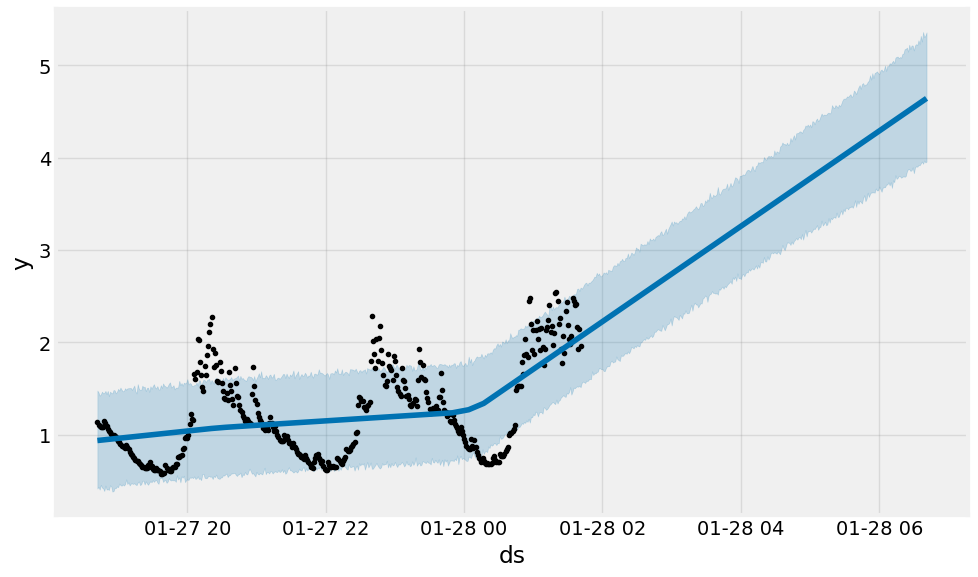

In [16]:
m = Prophet()

m.fit(data_train_a)

future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

01:39:00 - cmdstanpy - INFO - Chain [1] start processing
01:39:00 - cmdstanpy - INFO - Chain [1] done processing


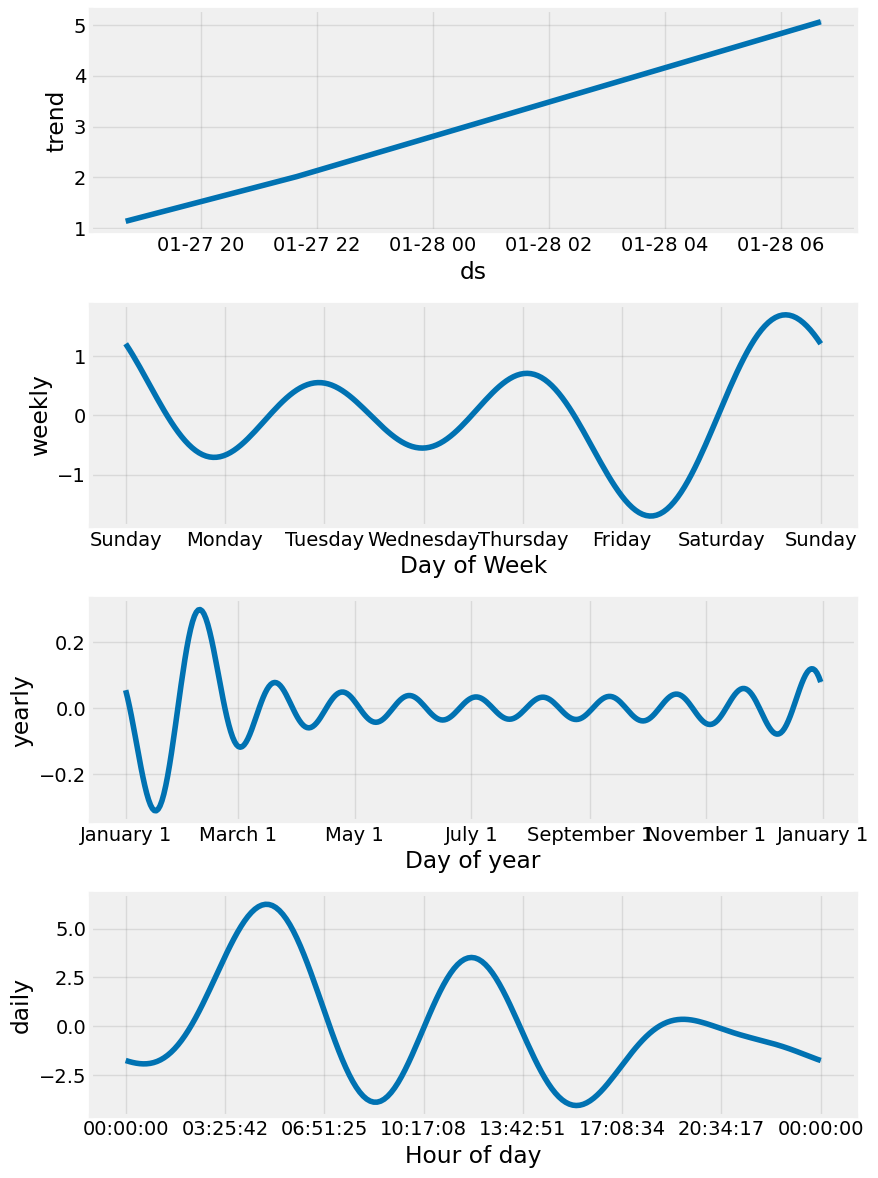

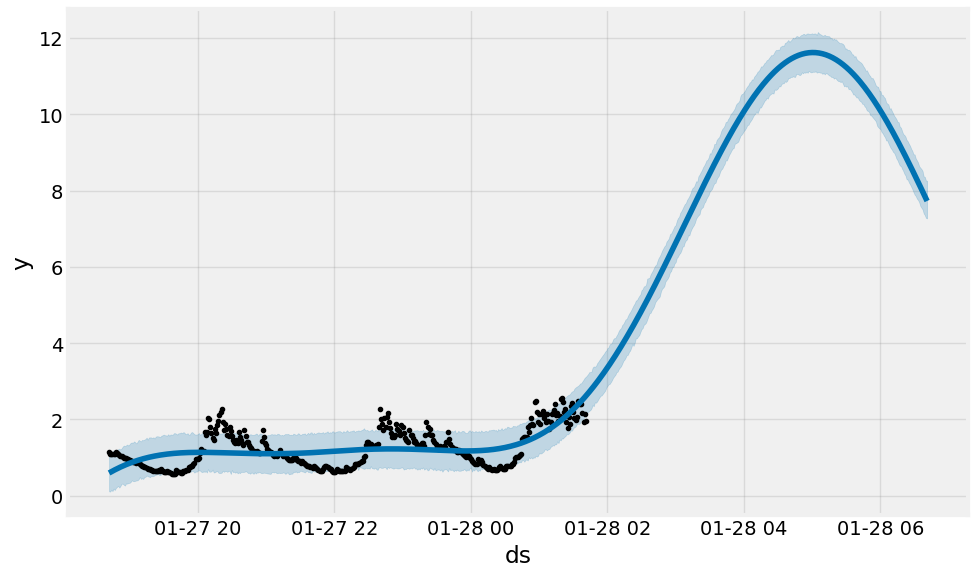

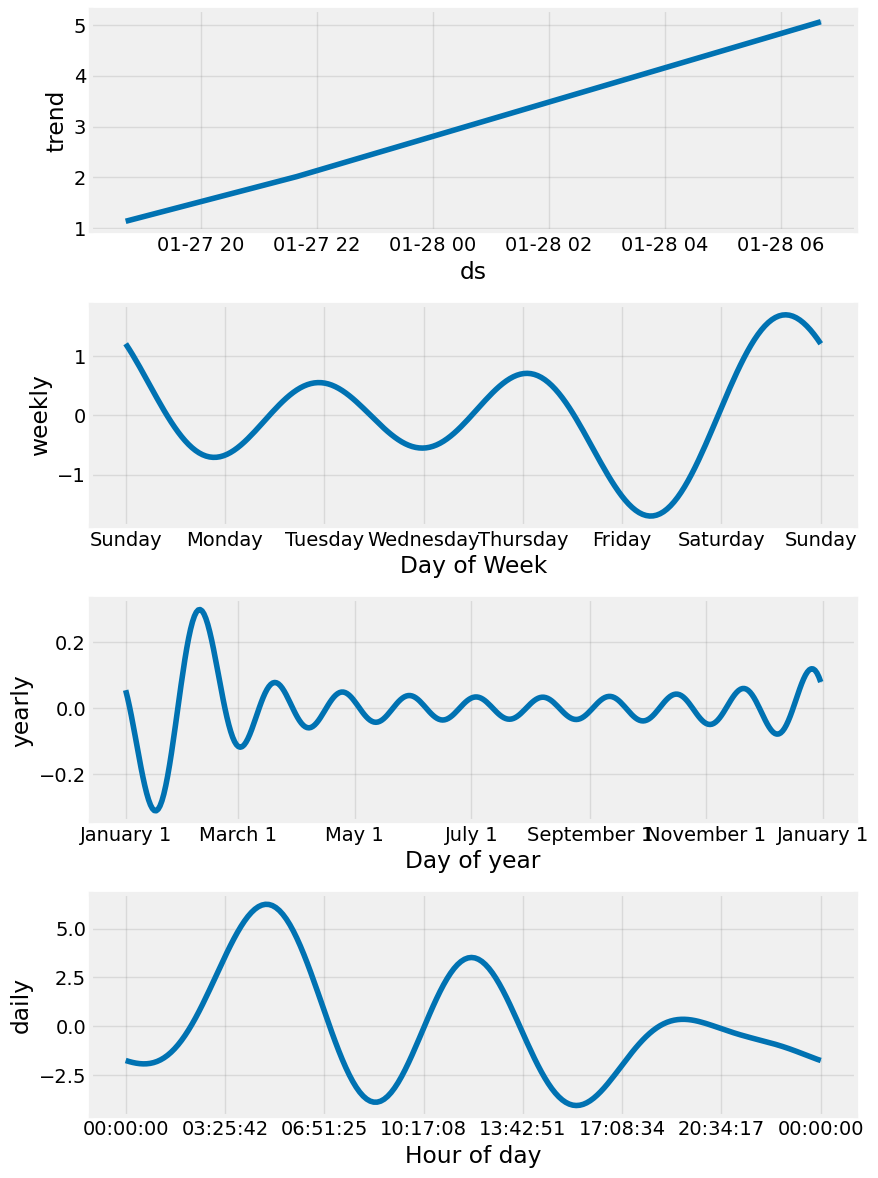

In [17]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True).fit(data_train_a)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

m.plot_components(fcst)

In [18]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)

In [19]:
data_train_a.index = pd.to_datetime(data_train_a.index)

In [20]:
stepwise_model = auto_arima(data_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=3.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.41 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.57 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=1.90 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.33 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.77 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=4.23 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=2.40 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=3.23 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.

In [21]:
stepwise_model.fit(data_train_a)


ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

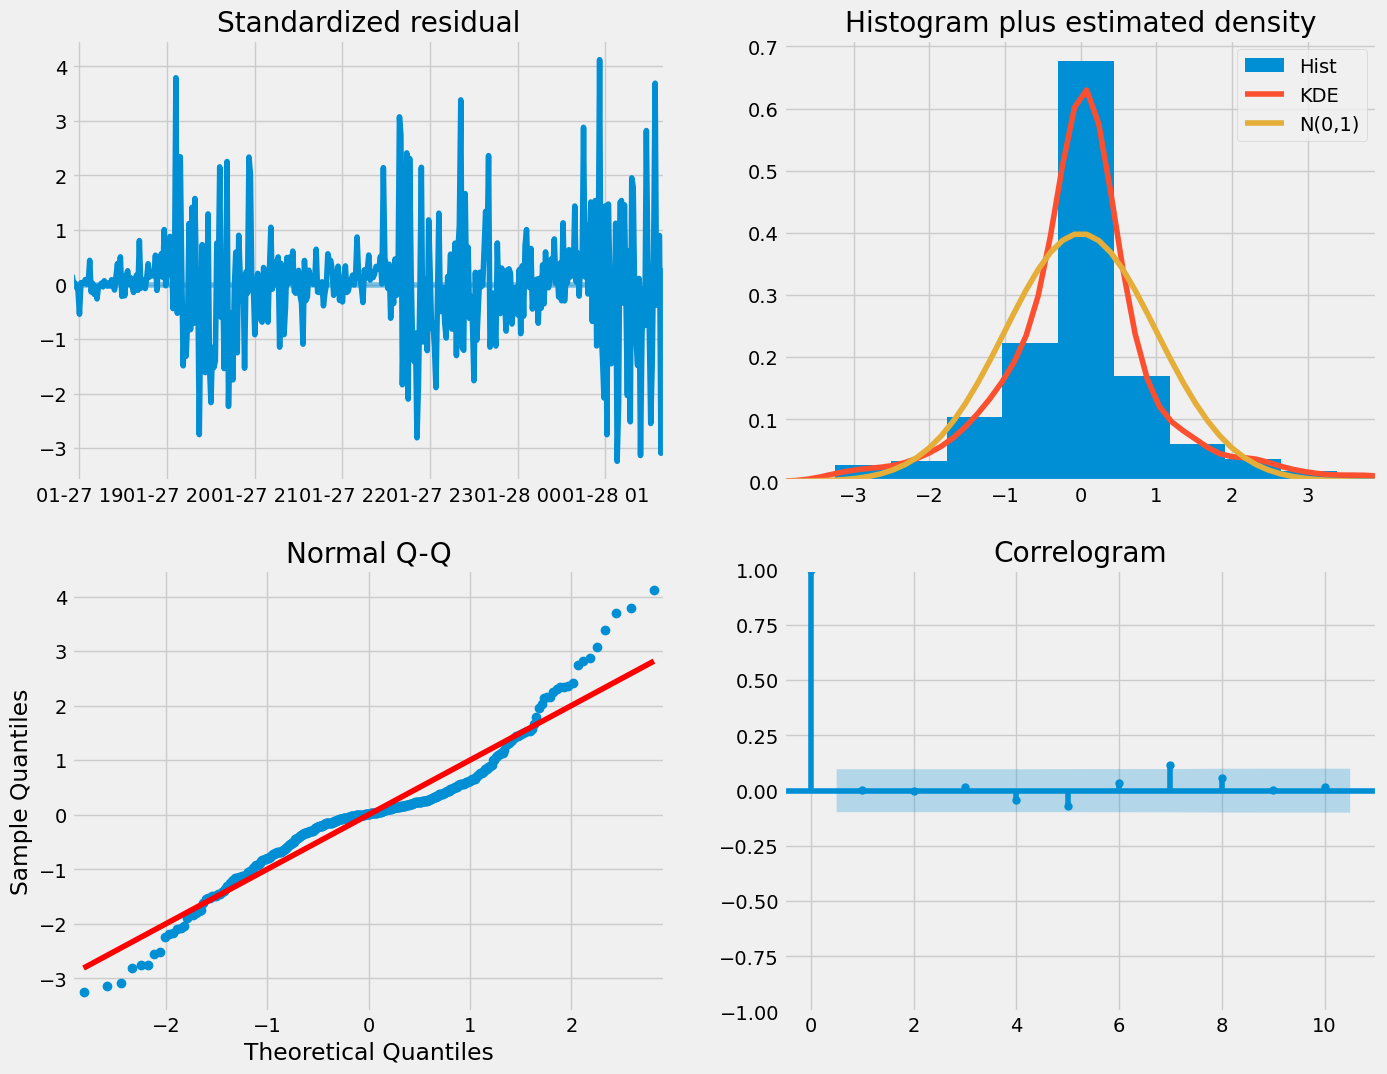

In [22]:
stepwise_model.fit(data_train_a).plot_diagnostics(figsize=(15, 12))
plt.show()

In [23]:
future_forecast = stepwise_model.predict(n_periods=60)

<AxesSubplot: title={'center': 'Actual followed by predicted values'}, xlabel='datetime'>

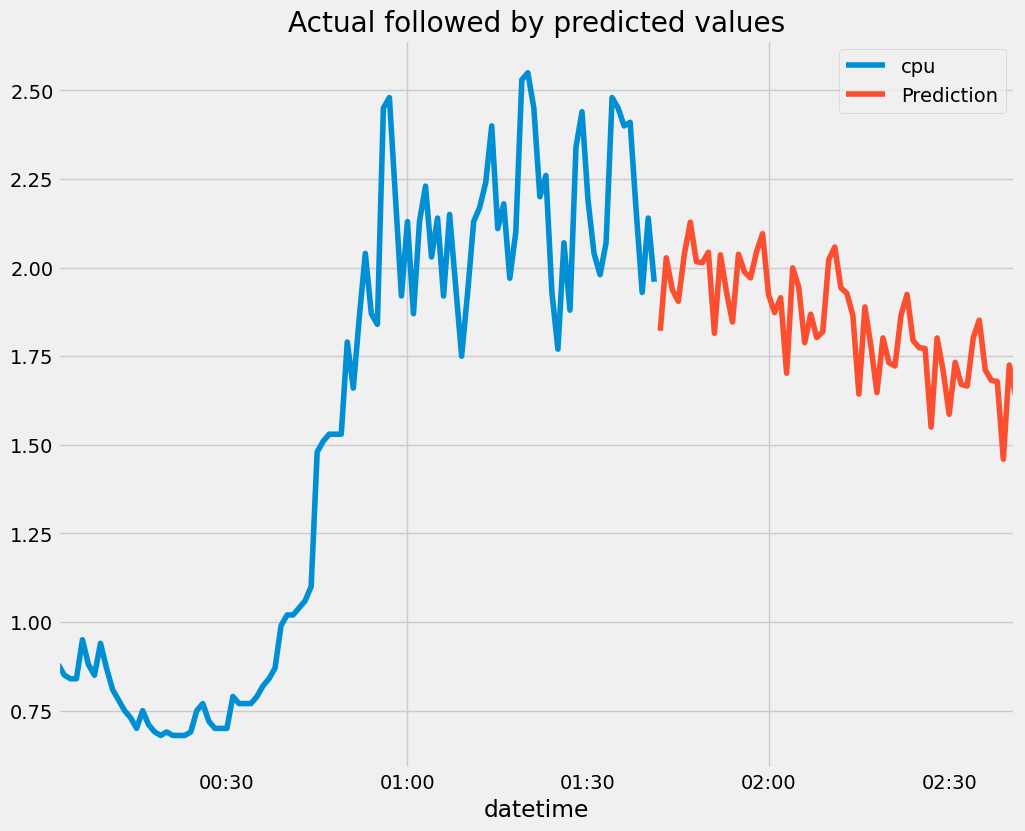

In [24]:
forecast_a = pd.DataFrame(future_forecast,index = data_test_a.index,columns=['Prediction'])
pd.concat([data_train_a.tail(100),forecast_a],axis=0).plot(title='Actual followed by predicted values')

<AxesSubplot: xlabel='datetime'>

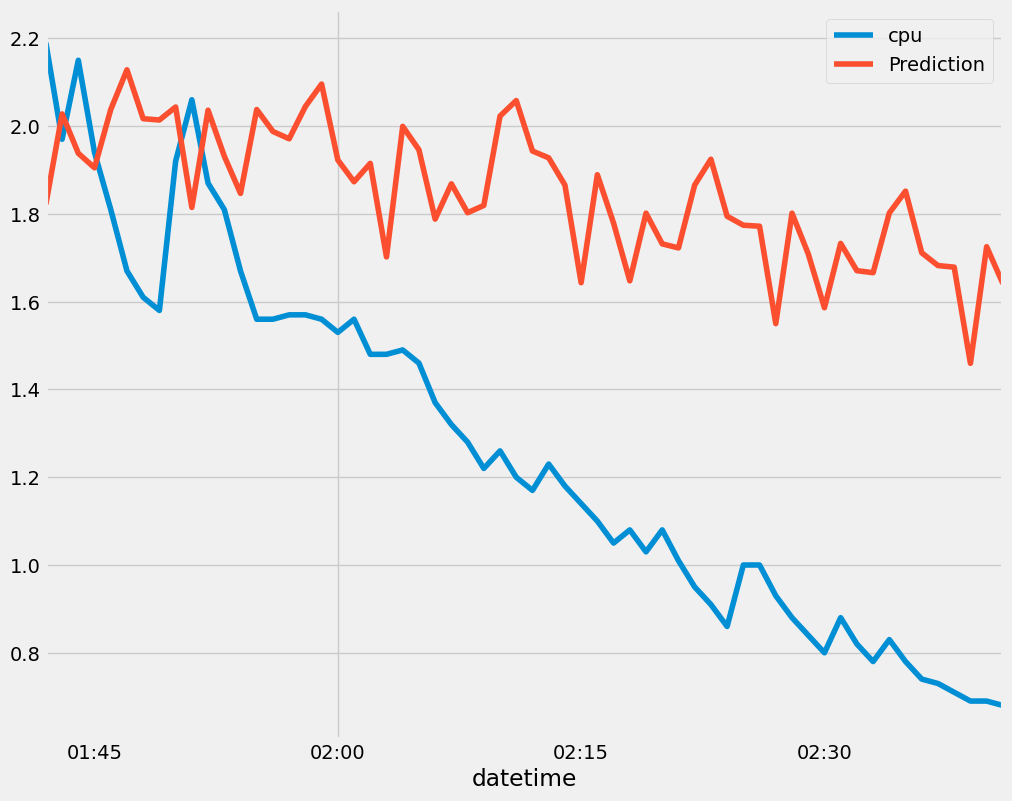

In [25]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_a.index,columns=['Prediction'])
pd.concat([data_test_a,future_forecast],axis=1).plot()

In [26]:
data_train_b.reset_index(inplace=True)

In [27]:
data_train_b.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

01:45:07 - cmdstanpy - INFO - Chain [1] start processing
01:45:07 - cmdstanpy - INFO - Chain [1] done processing


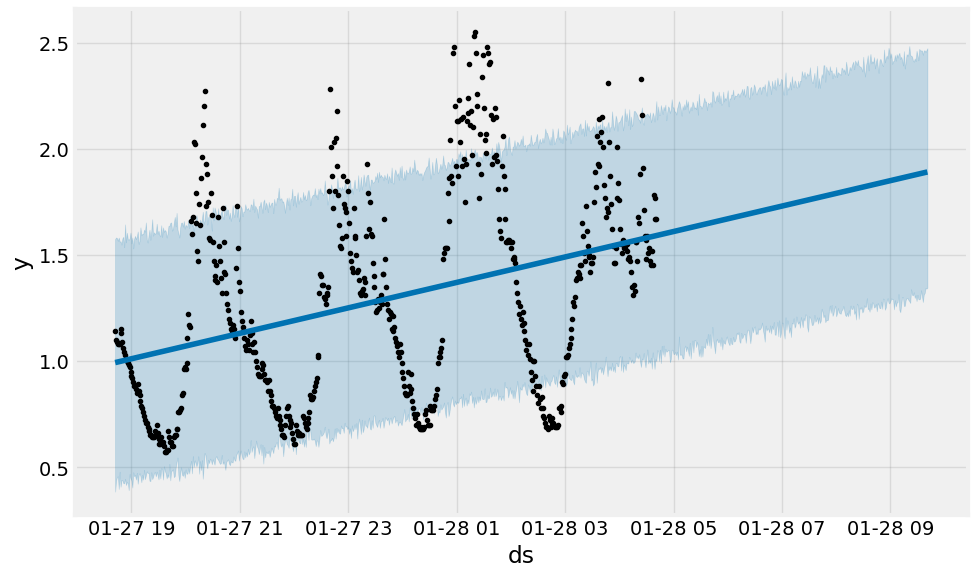

In [28]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_b)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [29]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)

In [30]:
data_train_b.index = pd.to_datetime(data_train_b.index)

In [31]:
stepwise_model = auto_arima(data_train_b, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-376.973, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-540.238, Time=0.68 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.87 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-375.034, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-618.341, Time=2.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=14.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-619.706, Time=1.81 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-541.973, Time=0.40 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=9.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.21 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-618.493, Time=2.01 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=11.60 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-617.729,

In [32]:
stepwise_model.fit(data_train_b)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

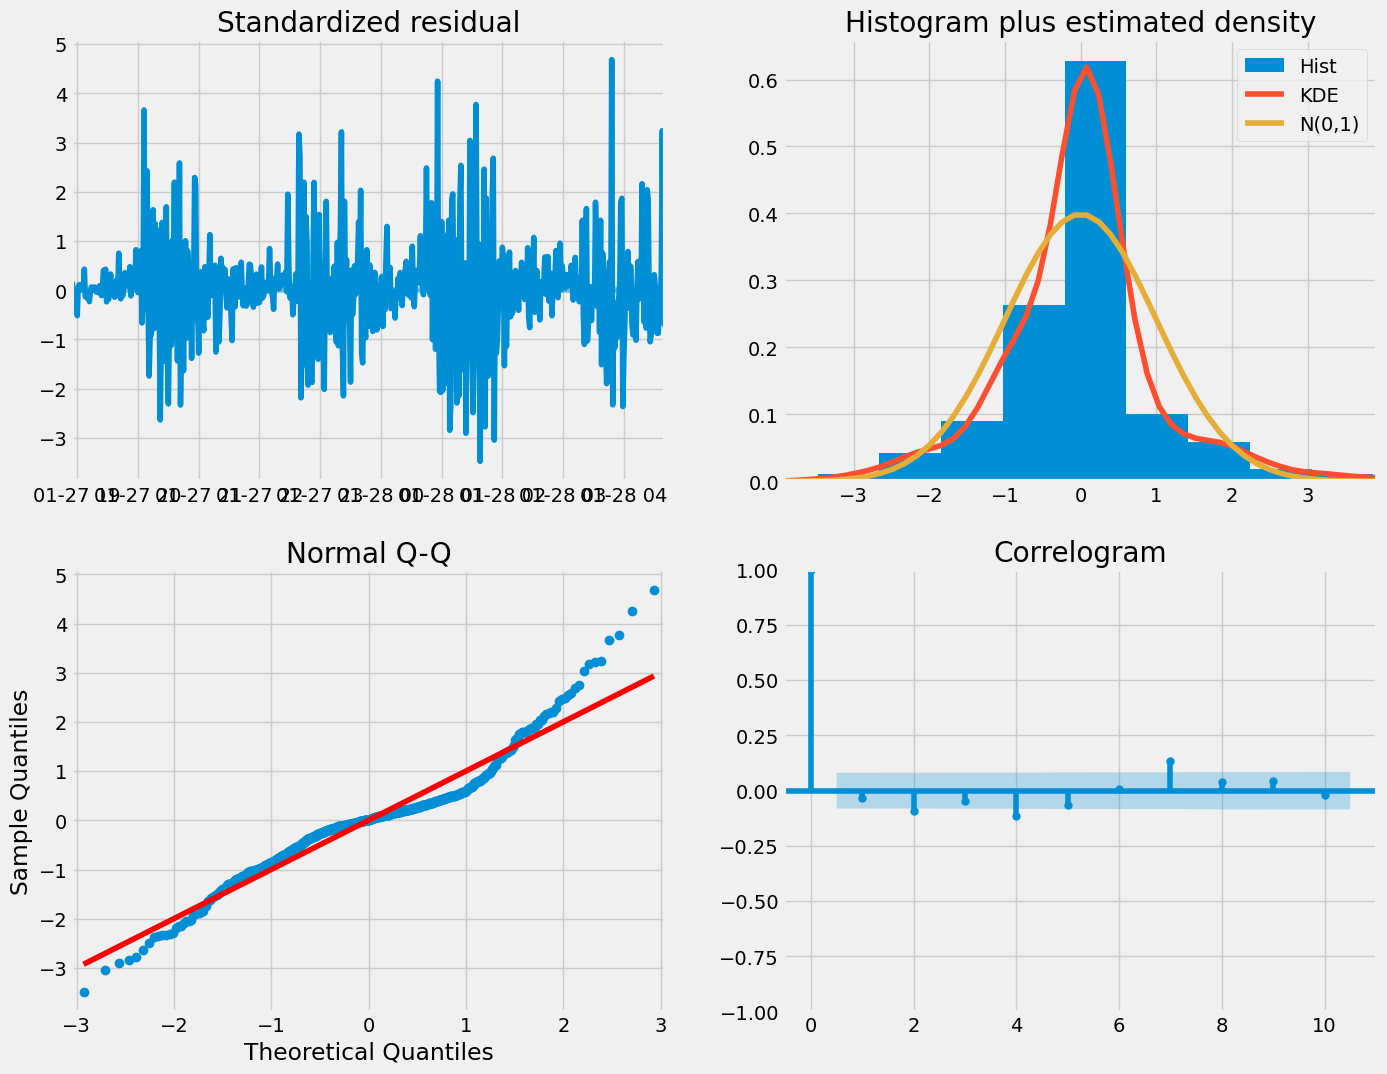

In [33]:
stepwise_model.fit(data_train_b).plot_diagnostics(figsize=(15, 12))
plt.show()

In [35]:
future_forecast = stepwise_model.predict(n_periods=60)

<AxesSubplot: title={'center': 'Actual followed by predicted values'}, xlabel='datetime'>

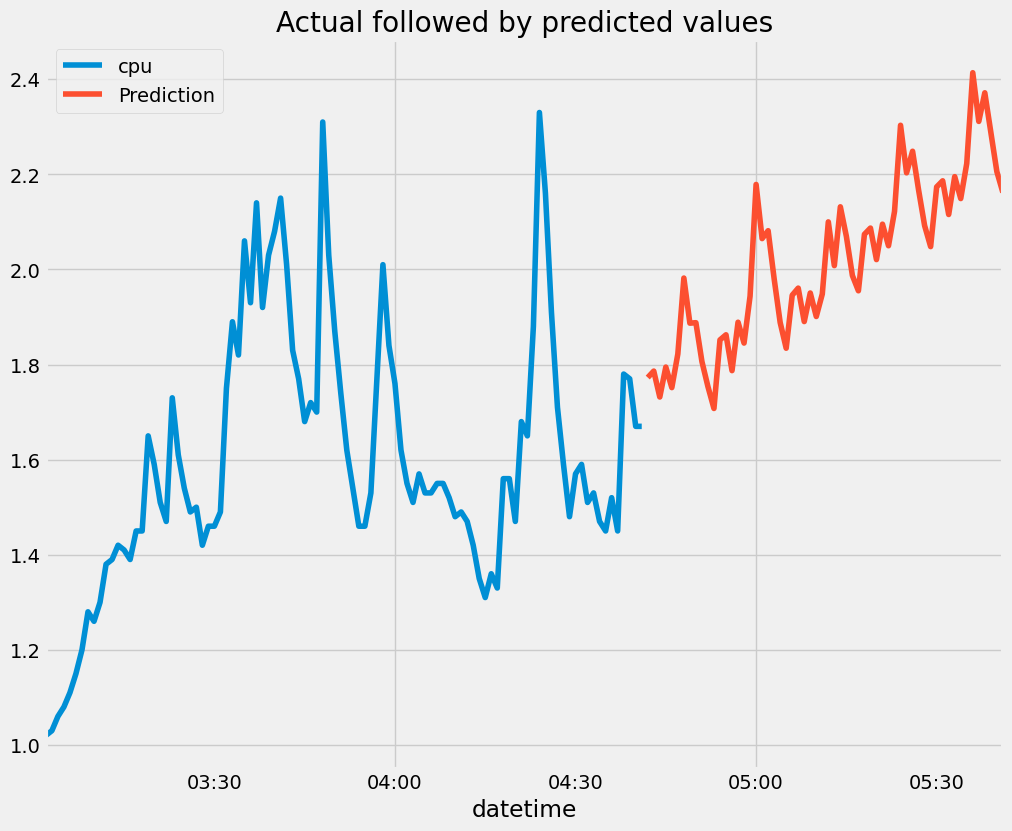

In [36]:
forecast_b = pd.DataFrame(future_forecast,index = data_test_b.index,columns=['Prediction'])
pd.concat([data_train_b.tail(100),forecast_b],axis=0).plot(title='Actual followed by predicted values')

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_b.index,columns=['Prediction'])
pd.concat([data_test_b,future_forecast],axis=1).plot()